In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from model import fit_dataarray, apply_model

In [2]:
malkin = pd.read_excel('data/malkin set with test errors and assigned targets 10_18_18 and color calculations.xlsx',
                       sheet_name='target reflectance', usecols='A:M')
malkin = malkin.to_xarray()
malkin = malkin.set_coords('wavelength').to_array('tile').swap_dims({'index': 'wavelength'}).drop('index')
malkin = malkin.rename('Reflectance')

In [3]:
test = pd.read_excel('data/malkin set with test errors and assigned targets 10_18_18 and color calculations.xlsx',
                    sheet_name='test reflectance', usecols='A:M')
test = test.to_xarray()
test = test.set_coords('wavelength').to_array('tile').swap_dims({'index': 'wavelength'}) #.drop('index')
test = test.rename('Reflectance (with errors)')

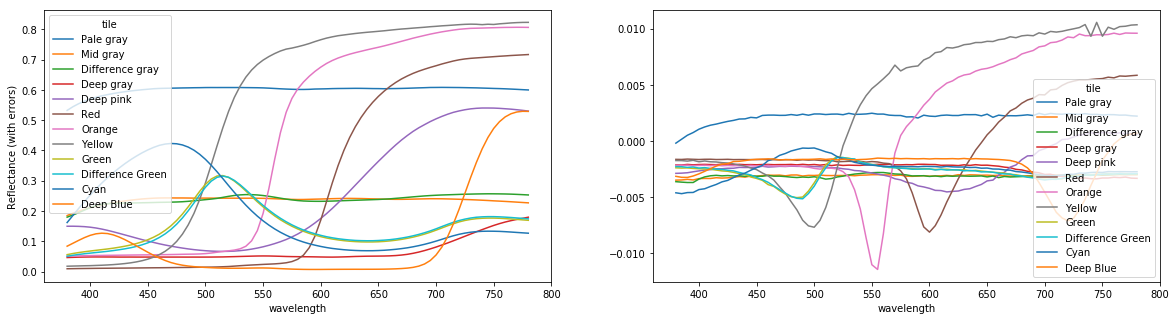

In [4]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
test.plot.line(ax=ax[0], x='wavelength')
(malkin - test).plot.line(ax=ax[1], x='wavelength')
plt.show()

In [5]:
me_coefs = fit_dataarray(test, malkin)

In [6]:
me_reconstruction = apply_model(test, me_coefs)

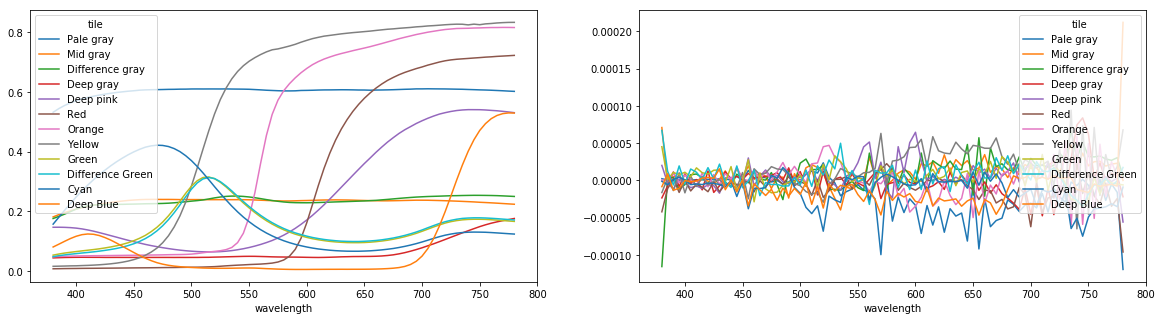

In [7]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
me_reconstruction.plot.line(ax=ax[0], x='wavelength')
(malkin - me_reconstruction).plot.line(ax=ax[1], x='wavelength')
plt.show()

In [8]:
cz_coefs = pd.read_excel(
    'data/malkin set with test errors and assigned targets 10_18_18 and color calculations.xlsx',
    sheet_name='CZ model coefficients', usecols='H:M', header=2, nrows=81
    )
cz_coefs['wavelength'] = cz_coefs.index
cz_coefs = cz_coefs.to_xarray().set_coords('wavelength').swap_dims({'index': 'wavelength'}).drop('index')
cz_coefs = cz_coefs.to_array(dim='coefficient')

In [13]:
cz_reconstruction = apply_model(test, cz_coefs)

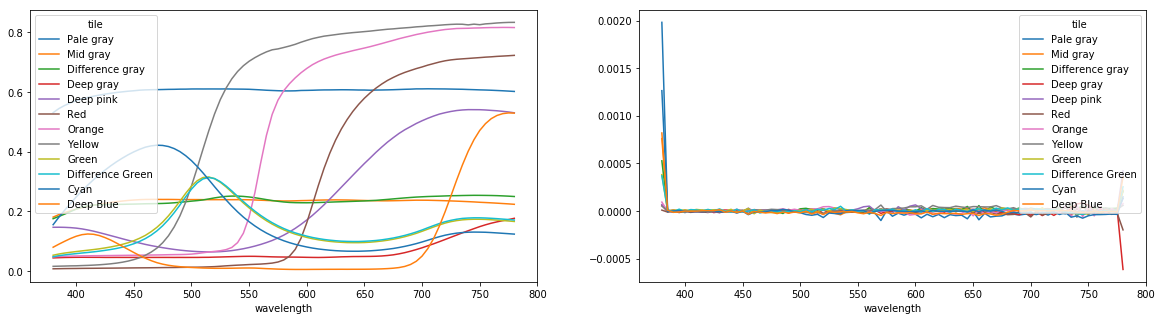

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
cz_reconstruction.plot.line(ax=ax[0], x='wavelength')
(malkin - cz_reconstruction).plot.line(ax=ax[1], x='wavelength')
plt.show()

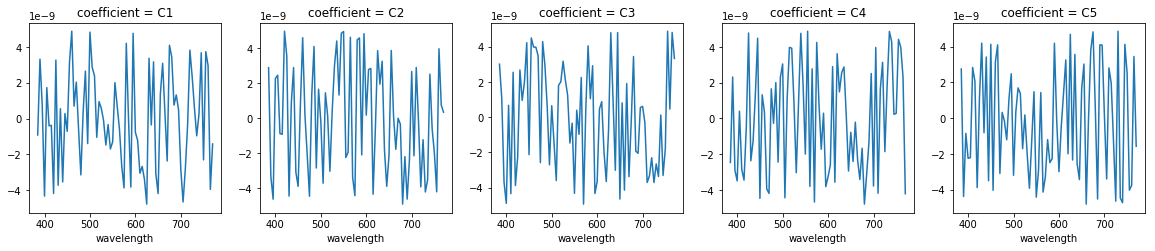

In [12]:
fig, ax = plt.subplots(ncols=5, figsize=(20,3.5))
for k, coef in enumerate(['C1', 'C2', 'C3', 'C4', 'C5']):
    (cz_coefs - me_coefs).isel(wavelength=slice(1,-2)).sel(coefficient=coef).plot.line(x='wavelength', ax=ax[k])
plt.show()